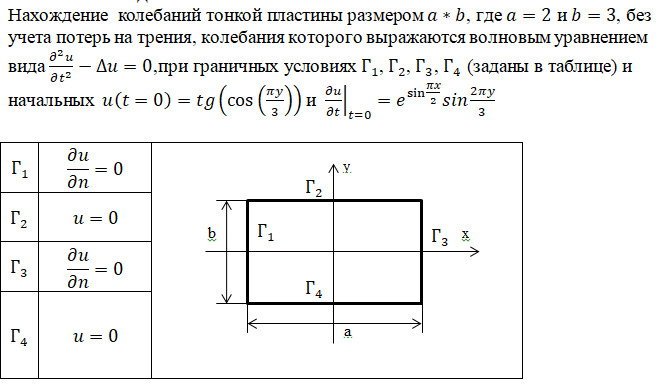

In [78]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np

In [79]:
# Создание дискретных функций

#Функция на нулевом слое
def phi(n, a1, b1, i, j, dx, dy):
    # 1 тест
    if (n == 1):
        return math.cos(math.pi * (a1 + i * dx)) * math.sin(math.pi * (b1 + j * dy))
    # 2 тест
    if (n == 2):
        return 0

    if (n == 3):
        return math.tan(math.cos((math.pi * (b1 + j * dy))/3))

#Производная функции на нулевом слое
def psi(n, a1, b1, i, j, dx, dy):
    # 1 тест
    if (n == 1):
        return 0
    # 2 тест
    if (n == 2):
        return math.cos((math.pi * (a1 + i * dx)) / 2) * math.sin((math.pi * (b1 + j * dy)) / 3)

    if (n == 3):
        return math.exp(math.sin((math.pi * (a1 + i * dx)) / 2)) * math.sin((2 * math.pi * (b1 + j * dy)) / 3)

#Функция на первом слое
def omega(n, a1, b1, i, j, dx, dy, dt):
    return psi(n, a1, b1, i, j, dx, dy) * dt + phi(n, a1, b1, i, j, dx, dy)

#0 слой
def Layer0(n, a1, b1, nx, ny, dx, dy, dt):
    u0 = np.zeros((nx, ny))
    for i in range(nx):
        for j in range(ny):
            u0[i][j] = phi(n, a1, b1, i, j, dx, dy)

    return u0

#1 слой
def Layer1(n, a1, b1, nx, ny, dx, dy, dt):
    u1 = np.zeros((nx, ny))
    for i in range(nx):
        for j in range(ny):
            u1[i][j] = omega(n, a1, b1, i, j, dx, dy, dt)

    return u1

#2 слой
def Layer2(n, a1, b1, nx, ny, dx, dy, dt):
    u2 = np.zeros((nx, ny))
    for i in range(nx):
        for j in range(ny):
            if (j == 0 or j == (ny - 1)):
                u2[i][j] = 0
            elif (i == 0):
                u2[i][j] = 2 * omega(n, a1, b1, i, j, dx, dy, dt) - phi(n, a1, b1, i, j, dx, dy) + ((dt * dt) / (dx * dx)) * (
                            -omega(n, a1, b1, i, j, dx, dy, dt) + omega(n, a1, b1, i + 1, j, dx, dy, dt)) + ((dt * dt) / (dy * dy)) * (
                             omega(n, a1, b1, i, j - 1, dx, dy, dt) - 2 * omega(n, a1, b1, i, j, dx, dy, dt) + omega(n,a1, b1, i, j + 1, dx, dy,dt))
            elif (i == (nx - 1)):
                u2[i][j] = 2 * omega(n, a1, b1, i, j, dx, dy, dt) - phi(n, a1, b1, i, j, dx, dy) + ((dt * dt) / (dx * dx)) * (
                            -omega(n, a1, b1, i, j, dx, dy, dt) + omega(n, a1, b1, i - 1, j, dx, dy, dt)) + ((dt * dt) / (dy * dy)) * (
                            omega(n, a1, b1, i, j - 1, dx, dy, dt) - 2 * omega(n, a1, b1, i, j, dx, dy, dt) + omega(n, a1, b1, i, j + 1, dx, dy,dt))
            else:
                u2[i][j] = 2 * omega(n, a1, b1, i, j, dx, dy, dt) - phi(n, a1, b1, i, j, dx, dy) + ((dt * dt) / (dx * dx)) * (
                            omega(n, a1, b1, i - 1, j, dx, dy, dt) - 2 * omega(n, a1, b1, i, j, dx, dy, dt) + omega(n, a1, b1, i + 1, j, dx, dy,dt)) + (
                            (dt * dt) / (dy * dy)) * (omega(n, a1, b1, i, j - 1, dx, dy, dt) - 2 * omega(n, a1, b1, i, j, dx, dy, dt) + omega(n, a1, b1, i, j + 1,dx, dy, dt))

    return u2

#3+ слой
def Layer(k, u, nx, ny, dx, dy, dt):
    u3 = np.zeros((nx, ny))
    for i in range(nx):
        for j in range(ny):
            if (j == 0 or j == (ny - 1)):
                u3[i][j] = 0
            elif (i == 0):
                u3[i][j] = 2 * u[k][i][j] - u[k - 1][i][j] + ((dt * dt) / (dx * dx)) * (
                            -u[k][i][j] + u[k][i + 1][j]) + ((dt * dt) / (dy * dy)) * (
                                       u[k][i][j - 1] - 2 * u[k][i][j] + u[k][i][j + 1])
            elif (i == (nx - 1)):
                u3[i][j] = 2 * u[k][i][j] - u[k - 1][i][j] + ((dt * dt) / (dx * dx)) * (
                            -u[k][i][j] + u[k][i - 1][j]) + ((dt * dt) / (dy * dy)) * (
                                       u[k][i][j - 1] - 2 * u[k][i][j] + u[k][i][j + 1])
            else:
                u3[i][j] = 2 * u[k][i][j] - u[k - 1][i][j] + ((dt * dt) / (dx * dx)) * (
                            u[k][i - 1][j] - 2 * u[k][i][j] + u[k][i + 1][j]) + ((dt * dt) / (dy * dy)) * (
                                       u[k][i][j - 1] - 2 * u[k][i][j] + u[k][i][j + 1])
    return u3

# Заполнение слоев
def Layers(n, a1, a2, b1, b2, T, dx, dy, dt):
    nx = int((a2 - a1) / dx) + 1
    ny = int((b2 - b1) / dy) + 1
    nt = int(T / dt) + 1

    u = np.zeros((nt, nx, ny))

    for k in range(nt):
        if (k == 0):
            u[k] = Layer0(n, a1, b1, nx, ny, dx, dy, dt)
        elif (k == 1):
            u[k] = Layer1(n, a1, b1, nx, ny, dx, dy, dt)
        elif (k == 2):
            u[k] = Layer2(n, a1, b1, nx, ny, dx, dy, dt)
        else:
            u[k] = Layer(k - 1, u, nx, ny, dx, dy, dt)

    return u

#Функция полученная аналитически (для тестовых примеров)
def UTest(n, a1, a2, b1, b2, T, dx, dy, dt):
    nx = int((a2 - a1) / dx) + 1
    ny = int((b2 - b1) / dy) + 1
    nt = int(T / dt) + 1
    ut = np.zeros((nt, nx, ny))

    if (n == 1):
        for k in range(nt):
            for i in range(nx):
                for j in range(ny):
                    ut[k][i][j] = math.cos((a1 + i * dx) * math.pi) * math.sin((b1 + j * dy) * math.pi) * math.cos((2 ** 0.5) * math.pi * (k * dt))
    if (n==2):
        for k in range(nt):
            for i in range(nx):
                for j in range(ny):
                    ut[k][i][j] = (6 / ((13 ** 0.5)* math.pi))* math.cos((a1 +i * dx) * (math.pi/2)) * math.sin((b1 + j * dy) * (math.pi/3)) * math.sin(((13 ** 0.5) * math.pi * (k * dt))/6)
    return ut

In [106]:
#значения длин сторон
a=2
b=3

#шаги разностной схемы
dx = 0.02
dy = 0.03
dt = 0.01

#общее время
T = 6

#кол-во разбиений отрезка
nx = 100 #по оси Ox и Oy
nt = 600 #по оси времени (кол-во слоев)

#номер задача (1 - тест1, 2 - тест2, 3 - поставленная задача)
n = 3

In [107]:
if (n == 1):
    # 1 тестовый пример
    ut = UTest(n, 0, a, 0, b, T, dx, dy, dt)
    u = Layers(n, 0, a, 0, b, T, dx, dy, dt)
    x = np.linspace(0, a, nx + 1)
    y = np.linspace(0, b, nx + 1)
    x, y = np.meshgrid(x, y, indexing = 'ij')
elif (n == 2):
    # 2 тестовый пример
    ut = UTest(n, 0, a, 0, b, T, dx, dy, dt)
    u = Layers(n, 0, a, 0, b, T, dx, dy, dt)
    x = np.linspace(0, a, nx + 1)
    y = np.linspace(0, b, nx + 1)
    x, y = np.meshgrid(x, y, indexing = 'ij')
else:
    # решение поставленной задачи
    u = Layers(3, -(a / 2), (a / 2), -(b / 2), (b / 2), T, dx, dy, dt)
    x = np.linspace(-(a / 2), (a / 2), nx + 1)
    y = np.linspace(-(b / 2), (b / 2), nx + 1)
    x, y = np.meshgrid(x, y, indexing = 'ij')

<IPython.core.display.Javascript object>


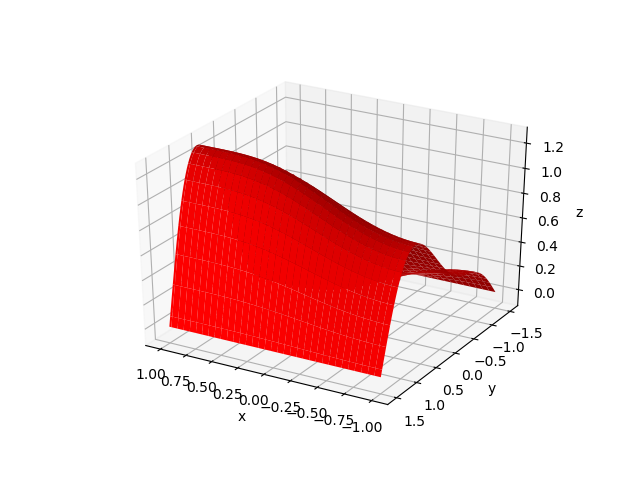

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')


ax.view_init(30, 120)
ax.set(xlabel='x', ylabel='y', zlabel='z')
ax.plot_surface(x, y, u[100], color=(1,0,0))

if(n != 3):
    ax.plot_surface(x, y, ut[100], color=(0,1,0))
    
plt.show()

In [84]:
def Err(u, ut, a1, a2, b1, b2, T, dx, dy, dt):
    nx = int((a2 - a1) / dx) + 1
    ny = int((b2 - b1) / dy) + 1
    nt = int(T / dt) + 1
    
    errmat = np.zeros((nt, nx, ny))
    normmat = np.zeros(nt)
    
    for k in range(nt):
        for i in range(nx):
            for j in range(ny):
                errmat[k][i][j] = abs(u[k][i][j]-ut[k][i][j])
                
        normmat[k] = np.linalg.norm(errmat[k], ord=2)
    
    return normmat

In [85]:
normmat = Err(u, ut, 0, a, 0, b, T, dx, dy, dt)

IndexError: index 301 is out of bounds for axis 0 with size 301

In [ ]:
plt.figure(figsize=(5, 5))
plt.xlabel("кол-во слоев") # ось абсцисс
plt.ylabel("значение нормы") # ось ординат
plt.grid() # включение отображение сетки

x = np.linspace(0, nt, (int(T / dt) + 1))
y = normmat

plt.plot(x, y, label='Погрешность')

plt.legend() # легенда